In [254]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [255]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dfNetwork = pd.read_csv("/Trafic Network/Trafic ucor/sampletelegram_ml.csv")
#se muestra el dataframe
dfNetwork.head()

,src_ip,dst_ip,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic
0,192.168.1.75,224.0.0.251,5353,5353,1588779596708,1588779598016,1327,0
1,fe80::4ba:91a:7817:e318,ff02::fb,5353,5353,1588779596708,1588779598016,1467,0
2,192.168.1.75,224.0.0.251,5353,5353,1588779598120,1588779600214,1440,0
3,fe80::4ba:91a:7817:e318,ff02::fb,5353,5353,1588779598121,1588779600214,1580,0
4,192.168.1.75,224.0.0.251,5353,5353,1588779600739,1588779601600,1396,0


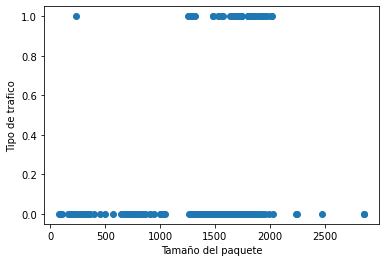

In [256]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('Tipo de trafico')
plott.xlabel('Tamaño del paquete')
plott.scatter(dfNetwork['bidirectional_bytes'],dfNetwork['target_traffic'])

In [257]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dfNetwork.columns=dfNetwork.columns.str.strip()

In [258]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [259]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= dfNetwork[['src_port','dst_port','bidirectional_bytes']]

X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=dfNetwork['target_traffic']
#Se visualizan las variables independientes 
X.head()

,src_port,dst_port,bidirectional_bytes
0,5353,5353,1327
1,5353,5353,1467
2,5353,5353,1440
3,5353,5353,1580
4,5353,5353,1396


In [260]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=30)

In [261]:
#Permite viusalizar información del dataframe
dfNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   src_ip                       251 non-null    object
 1   dst_ip                       251 non-null    object
 2   src_port                     251 non-null    int64 
 3   dst_port                     251 non-null    int64 
 4   bidirectional_first_seen_ms  251 non-null    int64 
 5   bidirectional_last_seen_ms   251 non-null    int64 
 6   bidirectional_bytes          251 non-null    int64 
 7   target_traffic               251 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 13.8+ KB


In [262]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dfNetwork.describe(),2)

,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic
count,251.00,251.00,2.510000e+02,2.510000e+02,251.00,251.00
mean,17951.43,13703.64,1.588780e+12,1.588780e+12,1341.93,0.16
std,15958.67,14034.84,1.624715e+04,1.536398e+04,560.82,0.37
min,68.00,53.00,1.588780e+12,1.588780e+12,82.00,0.00
25%,537.50,529.00,1.588780e+12,1.588780e+12,806.00,0.00
50%,23174.00,5353.00,1.588780e+12,1.588780e+12,1536.00,0.00
75%,28150.00,28150.00,1.588780e+12,1.588780e+12,1730.00,0.00
max,61974.00,60723.00,1.588780e+12,1.588780e+12,2854.00,1.00


In [263]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [264]:
#X_train

In [265]:
y_train

136    0
149    0
24     0
196    0
21     0
      ..
244    0
45     0
173    0
165    1
37     0
Name: target_traffic, Length: 200, dtype: int64

In [266]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [267]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [268]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,src_port,dst_port,bidirectional_bytes
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.398881e-16,5.329071e-17,8.881784e-18
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.140148e+00,-9.818671e-01,-2.319273e+00
25%,-1.109020e+00,-9.486467e-01,-9.439357e-01
50%,3.909759e-01,-6.119757e-01,3.541770e-01
75%,7.207115e-01,9.790462e-01,7.072048e-01
max,2.939336e+00,3.252343e+00,2.777566e+00


In [269]:
# Ahora lo haremos con logistica de regresión
#Se define el modelo de logística de regresión 
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [270]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [271]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [272]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [273]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.9607843137254902

In [274]:
get_score(SVC(),X_train,X_test,y_train,y_test)

1.0

In [275]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

1.0

In [276]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

1.0

In [277]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))

In [278]:
lg_score

[0.47619047619047616, 0.9404761904761905, 0.7108433734939759]

In [279]:
svm_score

[0.8809523809523809, 0.6904761904761905, 0.927710843373494]

In [280]:
rf_score

[1.0, 1.0, 1.0]

In [281]:
nby_score

[1.0, 1.0, 1.0]

In [282]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.94117647, 0.76470588, 1.        , 0.93939394, 1.        ])

In [283]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.88235294, 1.        , 0.97058824, 0.93939394, 1.        ])

In [284]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([0.97058824, 1.        , 1.        , 0.93939394, 1.        ])

In [285]:
cross_val_score(GaussianNB(),X_train,y_train)

array([1., 1., 1., 1., 1.])